In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
Dataset = pd.read_csv("Dataset_Female_Final.csv")
display(Dataset)

,Unnamed: 0,Age,Menopause_age,Tscore_Hip_total,CRP,Cr,ALP,BUN,P,Ca,...,Tscore_Hip_neck,Zscore_Hip_neck,BMI,Pregnancy_Count,Histroy_Anticoagulant,Active_Smoking,History_Smoking,Calcium_Supplement,History_Diabetes_2,Refracture
0,0,66,50.0,-1.6,5.0,1.1,320.0,25.0,4.5,8.9,...,-2.3,-0.8,26.700000,13.0,0,0,0,0,0,0
1,1,65,50.0,-2.6,6.0,0.7,170.0,17.0,4.2,8.9,...,-3.5,-2.0,28.300000,12.0,1,0,0,0,0,0
2,2,72,40.0,-1.7,29.0,0.7,190.0,19.0,4.3,8.9,...,-3.0,-1.1,24.400000,12.0,0,0,0,0,0,0
3,3,62,40.0,-0.2,1.0,0.9,175.0,16.0,3.2,8.8,...,-1.5,0.7,22.600000,12.0,0,0,0,0,0,0
4,4,76,50.0,-1.6,13.0,1.2,290.0,23.0,3.3,8.5,...,-1.8,0.3,33.200000,10.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,707,77,50.0,-2.2,11.0,1.0,134.0,11.0,3.7,9.2,...,-2.9,-0.8,28.827532,4.0,0,0,0,0,0,1
708,708,65,50.0,-1.0,33.0,0.8,123.0,12.0,2.3,9.6,...,-2.0,-0.5,28.827532,4.0,0,0,0,0,0,1
709,709,62,50.0,-0.1,19.0,0.9,201.0,12.0,4.7,8.8,...,-2.0,-0.7,28.827532,4.0,0,0,0,0,0,0
710,710,56,50.0,0.1,32.0,1.0,153.0,16.0,4.0,8.8,...,-1.2,-0.2,28.827532,4.0,0,0,0,0,0,0


In [3]:
Dataset.drop("Unnamed: 0", axis=1, inplace = True)

In [4]:
display(Dataset)

,Age,Menopause_age,Tscore_Hip_total,CRP,Cr,ALP,BUN,P,Ca,PTH,...,Tscore_Hip_neck,Zscore_Hip_neck,BMI,Pregnancy_Count,Histroy_Anticoagulant,Active_Smoking,History_Smoking,Calcium_Supplement,History_Diabetes_2,Refracture
0,66,50.0,-1.6,5.0,1.1,320.0,25.0,4.5,8.9,35.0,...,-2.3,-0.8,26.700000,13.0,0,0,0,0,0,0
1,65,50.0,-2.6,6.0,0.7,170.0,17.0,4.2,8.9,31.4,...,-3.5,-2.0,28.300000,12.0,1,0,0,0,0,0
2,72,40.0,-1.7,29.0,0.7,190.0,19.0,4.3,8.9,42.0,...,-3.0,-1.1,24.400000,12.0,0,0,0,0,0,0
3,62,40.0,-0.2,1.0,0.9,175.0,16.0,3.2,8.8,53.0,...,-1.5,0.7,22.600000,12.0,0,0,0,0,0,0
4,76,50.0,-1.6,13.0,1.2,290.0,23.0,3.3,8.5,65.0,...,-1.8,0.3,33.200000,10.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,77,50.0,-2.2,11.0,1.0,134.0,11.0,3.7,9.2,60.7,...,-2.9,-0.8,28.827532,4.0,0,0,0,0,0,1
708,65,50.0,-1.0,33.0,0.8,123.0,12.0,2.3,9.6,48.0,...,-2.0,-0.5,28.827532,4.0,0,0,0,0,0,1
709,62,50.0,-0.1,19.0,0.9,201.0,12.0,4.7,8.8,185.0,...,-2.0,-0.7,28.827532,4.0,0,0,0,0,0,0
710,56,50.0,0.1,32.0,1.0,153.0,16.0,4.0,8.8,68.0,...,-1.2,-0.2,28.827532,4.0,0,0,0,0,0,0


In [5]:
Dataset.columns

Index(['Age', 'Menopause_age', 'Tscore_Hip_total', 'CRP', 'Cr', 'ALP', 'BUN',
       'P', 'Ca', 'PTH', 'Vit_D3', 'BMD_vertebra', 'Tscore_vertebra',
       'Zscore_vertebra', 'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck',
       'Tscore_Hip_neck', 'Zscore_Hip_neck', 'BMI', 'Pregnancy_Count',
       'Histroy_Anticoagulant', 'Active_Smoking', 'History_Smoking',
       'Calcium_Supplement', 'History_Diabetes_2', 'Refracture'],
      dtype='object')

In [6]:
data_mean, data_std = np.mean(Dataset['Age']), np.std(Dataset['Age'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Age'] if x < lower or x > upper]
print('Age Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Age'])):
    if Dataset['Age'][i] < lower:
        Dataset['Age'][i] = lower
        
        
for i in range(len(Dataset['Age'])):
    if Dataset['Age'][i] > upper:
        Dataset['Age'][i] = upper
        

outliers = [x for x in Dataset['Age'] if x < lower or x > upper]
print('Age Column Identified outliers: %d' % len(outliers))
###########################################################################################

data_mean, data_std = np.mean(Dataset['Tscore_Hip_total']), np.std(Dataset['Tscore_Hip_total'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Tscore_Hip_total'] if x < lower or x > upper]
print('Tscore_Hip_total Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Tscore_Hip_total'])):
    if Dataset['Tscore_Hip_total'][i] < lower:
        Dataset['Tscore_Hip_total'][i] = lower
        
        
for i in range(len(Dataset['Tscore_Hip_total'])):
    if Dataset['Tscore_Hip_total'][i] > upper:
        Dataset['Tscore_Hip_total'][i] = upper
        

outliers = [x for x in Dataset['Tscore_Hip_total'] if x < lower or x > upper]
print('Tscore_Hip_total Column Identified outliers: %d' % len(outliers))
#########################################################################################

data_mean, data_std = np.mean(Dataset['CRP']), np.std(Dataset['CRP'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['CRP'] if x < lower or x > upper]
print('CRP Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['CRP'])):
    if Dataset['CRP'][i] < lower:
        Dataset['CRP'][i] = lower
        
        
for i in range(len(Dataset['CRP'])):
    if Dataset['CRP'][i] > upper:
        Dataset['CRP'][i] = upper
        

outliers = [x for x in Dataset['CRP'] if x < lower or x > upper]
print('CRP Column Identified outliers: %d' % len(outliers))
########################################################################################
data_mean, data_std = np.mean(Dataset['Cr']), np.std(Dataset['Cr'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Cr'] if x < lower or x > upper]
print('Cr Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Cr'])):
    if Dataset['Cr'][i] < lower:
        Dataset['Cr'][i] = lower
        
        
for i in range(len(Dataset['Cr'])):
    if Dataset['Cr'][i] > upper:
        Dataset['Cr'][i] = upper
        

outliers = [x for x in Dataset['Cr'] if x < lower or x > upper]
print('Cr Column Identified outliers: %d' % len(outliers))
###########################################################################################

data_mean, data_std = np.mean(Dataset['ALP']), np.std(Dataset['ALP'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['ALP'] if x < lower or x > upper]
print('ALP Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['ALP'])):
    if Dataset['ALP'][i] < lower:
        Dataset['ALP'][i] = lower
        
        
for i in range(len(Dataset['ALP'])):
    if Dataset['ALP'][i] > upper:
        Dataset['ALP'][i] = upper
        

outliers = [x for x in Dataset['ALP'] if x < lower or x > upper]
print('ALP Column Identified outliers: %d' % len(outliers))
##########################################################################################

data_mean, data_std = np.mean(Dataset['BUN']), np.std(Dataset['BUN'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BUN'] if x < lower or x > upper]
print('BUN Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['BUN'])):
    if Dataset['BUN'][i] < lower:
        Dataset['BUN'][i] = lower
        
        
for i in range(len(Dataset['BUN'])):
    if Dataset['BUN'][i] > upper:
        Dataset['BUN'][i] = upper
        

outliers = [x for x in Dataset['BUN'] if x < lower or x > upper]
print('BUN Column Identified outliers: %d' % len(outliers))
#############################################################################################

data_mean, data_std = np.mean(Dataset['P']), np.std(Dataset['P'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['P'] if x < lower or x > upper]
print('P Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['P'])):
    if Dataset['P'][i] < lower:
        Dataset['P'][i] = lower
        
        
for i in range(len(Dataset['P'])):
    if Dataset['P'][i] > upper:
        Dataset['P'][i] = upper
        

outliers = [x for x in Dataset['P'] if x < lower or x > upper]
print('P Column Identified outliers: %d' % len(outliers))
##############################################################################################

data_mean, data_std = np.mean(Dataset['Ca']), np.std(Dataset['Ca'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Ca'] if x < lower or x > upper]
print('Ca Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Ca'])):
    if Dataset['Ca'][i] < lower:
        Dataset['Ca'][i] = lower
        
        
for i in range(len(Dataset['Ca'])):
    if Dataset['Ca'][i] > upper:
        Dataset['Ca'][i] = upper
        

outliers = [x for x in Dataset['Ca'] if x < lower or x > upper]
print('Ca Column Identified outliers: %d' % len(outliers))
############################################################################################

data_mean, data_std = np.mean(Dataset['PTH']), np.std(Dataset['PTH'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['PTH'] if x < lower or x > upper]
print('PTH Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['PTH'])):
    if Dataset['PTH'][i] < lower:
        Dataset['PTH'][i] = lower
        
        
for i in range(len(Dataset['PTH'])):
    if Dataset['PTH'][i] > upper:
        Dataset['PTH'][i] = upper
        

outliers = [x for x in Dataset['PTH'] if x < lower or x > upper]
print('PTH Column Identified outliers: %d' % len(outliers))
##########################################################################################

data_mean, data_std = np.mean(Dataset['Vit_D3']), np.std(Dataset['Vit_D3'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Vit_D3'] if x < lower or x > upper]
print('Vit_D3 Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Vit_D3'])):
    if Dataset['Vit_D3'][i] < lower:
        Dataset['Vit_D3'][i] = lower
        
        
for i in range(len(Dataset['Vit_D3'])):
    if Dataset['Vit_D3'][i] > upper:
        Dataset['Vit_D3'][i] = upper
        

outliers = [x for x in Dataset['Vit_D3'] if x < lower or x > upper]
print('Vit_D3 Column Identified outliers: %d' % len(outliers))
########################################################################################

data_mean, data_std = np.mean(Dataset['BMD_vertebra']), np.std(Dataset['BMD_vertebra'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BMD_vertebra'] if x < lower or x > upper]
print('BMD_vertebra Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['BMD_vertebra'])):
    if Dataset['BMD_vertebra'][i] < lower:
        Dataset['BMD_vertebra'][i] = lower
        
        
for i in range(len(Dataset['BMD_vertebra'])):
    if Dataset['BMD_vertebra'][i] > upper:
        Dataset['BMD_vertebra'][i] = upper
        

outliers = [x for x in Dataset['BMD_vertebra'] if x < lower or x > upper]
print('BMD_vertebra Column Identified outliers: %d' % len(outliers))
############################################################################################

data_mean, data_std = np.mean(Dataset['Tscore_vertebra']), np.std(Dataset['Tscore_vertebra'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Tscore_vertebra'] if x < lower or x > upper]
print('Tscore_vertebra Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Tscore_vertebra'])):
    if Dataset['Tscore_vertebra'][i] < lower:
        Dataset['Tscore_vertebra'][i] = lower
        
        
for i in range(len(Dataset['Tscore_vertebra'])):
    if Dataset['Tscore_vertebra'][i] > upper:
        Dataset['Tscore_vertebra'][i] = upper
        

outliers = [x for x in Dataset['Tscore_vertebra'] if x < lower or x > upper]
print('Tscore_vertebra Column Identified outliers: %d' % len(outliers))
##########################################################################################

data_mean, data_std = np.mean(Dataset['Zscore_vertebra']), np.std(Dataset['Zscore_vertebra'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Zscore_vertebra'] if x < lower or x > upper]
print('Zscore_vertebra Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Zscore_vertebra'])):
    if Dataset['Zscore_vertebra'][i] < lower:
        Dataset['Zscore_vertebra'][i] = lower
        
        
for i in range(len(Dataset['Zscore_vertebra'])):
    if Dataset['Zscore_vertebra'][i] > upper:
        Dataset['Zscore_vertebra'][i] = upper
        

outliers = [x for x in Dataset['Zscore_vertebra'] if x < lower or x > upper]
print('Zscore_vertebra Column Identified outliers: %d' % len(outliers))
########################################################################################

data_mean, data_std = np.mean(Dataset['BMD_Hip_total']), np.std(Dataset['BMD_Hip_total'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BMD_Hip_total'] if x < lower or x > upper]
print('BMD_Hip_total Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['BMD_Hip_total'])):
    if Dataset['BMD_Hip_total'][i] < lower:
        Dataset['BMD_Hip_total'][i] = lower
        
        
for i in range(len(Dataset['BMD_Hip_total'])):
    if Dataset['BMD_Hip_total'][i] > upper:
        Dataset['BMD_Hip_total'][i] = upper
        

outliers = [x for x in Dataset['BMD_Hip_total'] if x < lower or x > upper]
print('BMD_Hip_total Column Identified outliers: %d' % len(outliers))
############################################################################################

data_mean, data_std = np.mean(Dataset['Zscore_hip_total']), np.std(Dataset['Zscore_hip_total'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Zscore_hip_total'] if x < lower or x > upper]
print('Zscore_hip_total Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Zscore_hip_total'])):
    if Dataset['Zscore_hip_total'][i] < lower:
        Dataset['Zscore_hip_total'][i] = lower
        
        
for i in range(len(Dataset['Zscore_hip_total'])):
    if Dataset['Zscore_hip_total'][i] > upper:
        Dataset['Zscore_hip_total'][i] = upper
        

outliers = [x for x in Dataset['Zscore_hip_total'] if x < lower or x > upper]
print('Zscore_hip_total Column Identified outliers: %d' % len(outliers))
##########################################################################################

data_mean, data_std = np.mean(Dataset['BMD_Hip_Neck']), np.std(Dataset['BMD_Hip_Neck'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BMD_Hip_Neck'] if x < lower or x > upper]
print('BMD_Hip_Neck Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['BMD_Hip_Neck'])):
    if Dataset['BMD_Hip_Neck'][i] < lower:
        Dataset['BMD_Hip_Neck'][i] = lower
        
        
for i in range(len(Dataset['BMD_Hip_Neck'])):
    if Dataset['BMD_Hip_Neck'][i] > upper:
        Dataset['BMD_Hip_Neck'][i] = upper
        

outliers = [x for x in Dataset['BMD_Hip_Neck'] if x < lower or x > upper]
print('BMD_Hip_Neck Column Identified outliers: %d' % len(outliers))
########################################################################################

data_mean, data_std = np.mean(Dataset['Tscore_Hip_neck']), np.std(Dataset['Tscore_Hip_neck'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Tscore_Hip_neck'] if x < lower or x > upper]
print('Tscore_Hip_neck Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Tscore_Hip_neck'])):
    if Dataset['Tscore_Hip_neck'][i] < lower:
        Dataset['Tscore_Hip_neck'][i] = lower
        
        
for i in range(len(Dataset['Tscore_Hip_neck'])):
    if Dataset['Tscore_Hip_neck'][i] > upper:
        Dataset['Tscore_Hip_neck'][i] = upper
        

outliers = [x for x in Dataset['Tscore_Hip_neck'] if x < lower or x > upper]
print('Tscore_Hip_neck Column Identified outliers: %d' % len(outliers))
############################################################################################

data_mean, data_std = np.mean(Dataset['Zscore_Hip_neck']), np.std(Dataset['Zscore_Hip_neck'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Zscore_Hip_neck'] if x < lower or x > upper]
print('Zscore_Hip_neck Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Zscore_Hip_neck'])):
    if Dataset['Zscore_Hip_neck'][i] < lower:
        Dataset['Zscore_Hip_neck'][i] = lower
        
        
for i in range(len(Dataset['Zscore_Hip_neck'])):
    if Dataset['Zscore_Hip_neck'][i] > upper:
        Dataset['Zscore_Hip_neck'][i] = upper
        

outliers = [x for x in Dataset['Zscore_Hip_neck'] if x < lower or x > upper]
print('Zscore_Hip_neck Column Identified outliers: %d' % len(outliers))

##########################################################################################

data_mean, data_std = np.mean(Dataset['BMI']), np.std(Dataset['BMI'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BMI'] if x < lower or x > upper]
print('BMI Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['BMI'])):
    if Dataset['BMI'][i] < lower:
        Dataset['BMI'][i] = lower
        
        
for i in range(len(Dataset['BMI'])):
    if Dataset['BMI'][i] > upper:
        Dataset['BMI'][i] = upper
        

outliers = [x for x in Dataset['BMI'] if x < lower or x > upper]
print('BMI Column Identified outliers: %d' % len(outliers))
########################################################################################

data_mean, data_std = np.mean(Dataset['Menopause_age']), np.std(Dataset['Menopause_age'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Menopause_age'] if x < lower or x > upper]
print('Menopause_age Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Menopause_age'])):
    if Dataset['Menopause_age'][i] < lower:
        Dataset['Menopause_age'][i] = lower
        
        
for i in range(len(Dataset['Menopause_age'])):
    if Dataset['Menopause_age'][i] > upper:
        Dataset['Menopause_age'][i] = upper
        

outliers = [x for x in Dataset['Menopause_age'] if x < lower or x > upper]
print('Menopause_age Column Identified outliers: %d' % len(outliers))
###########################################################################################
data_mean, data_std = np.mean(Dataset['Pregnancy_Count']), np.std(Dataset['Pregnancy_Count'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Pregnancy_Count'] if x < lower or x > upper]
print('Pregnancy_Count Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Pregnancy_Count'])):
    if Dataset['Pregnancy_Count'][i] < lower:
        Dataset['Pregnancy_Count'][i] = lower
        
        
for i in range(len(Dataset['Pregnancy_Count'])):
    if Dataset['Pregnancy_Count'][i] > upper:
        Dataset['Pregnancy_Count'][i] = upper
        

outliers = [x for x in Dataset['Pregnancy_Count'] if x < lower or x > upper]
print('Pregnancy_Count Column Identified outliers: %d' % len(outliers))

Age Column Identified outliers: 1
Age Column Identified outliers: 0
Tscore_Hip_total Column Identified outliers: 3
Tscore_Hip_total Column Identified outliers: 0
CRP Column Identified outliers: 25
CRP Column Identified outliers: 0
Cr Column Identified outliers: 11
Cr Column Identified outliers: 0
ALP Column Identified outliers: 11
ALP Column Identified outliers: 0
BUN Column Identified outliers: 15
BUN Column Identified outliers: 0
P Column Identified outliers: 4
P Column Identified outliers: 0
Ca Column Identified outliers: 6
Ca Column Identified outliers: 0
PTH Column Identified outliers: 5
PTH Column Identified outliers: 0
Vit_D3 Column Identified outliers: 10
Vit_D3 Column Identified outliers: 0
BMD_vertebra Column Identified outliers: 4
BMD_vertebra Column Identified outliers: 0
Tscore_vertebra Column Identified outliers: 5
Tscore_vertebra Column Identified outliers: 0
Zscore_vertebra Column Identified outliers: 4
Zscore_vertebra Column Identified outliers: 0
BMD_Hip_total Column 

C:\Users\alish\AppData\Local\Temp\ipykernel_52748\3804175493.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Age'][i] = upper
C:\Users\alish\AppData\Local\Temp\ipykernel_52748\3804175493.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Tscore_Hip_total'][i] = lower
C:\Users\alish\AppData\Local\Temp\ipykernel_52748\3804175493.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Tscore_Hip_total'][i] =

In [7]:
X= Dataset.loc[:, Dataset.columns != 'Refracture']
Y = Dataset["Refracture"]

In [8]:
sm = SMOTE(random_state=5)
X_balanced, Y_balanced = sm.fit_resample(X, Y)

In [9]:
X.columns

Index(['Age', 'Menopause_age', 'Tscore_Hip_total', 'CRP', 'Cr', 'ALP', 'BUN',
       'P', 'Ca', 'PTH', 'Vit_D3', 'BMD_vertebra', 'Tscore_vertebra',
       'Zscore_vertebra', 'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck',
       'Tscore_Hip_neck', 'Zscore_Hip_neck', 'BMI', 'Pregnancy_Count',
       'Histroy_Anticoagulant', 'Active_Smoking', 'History_Smoking',
       'Calcium_Supplement', 'History_Diabetes_2'],
      dtype='object')

In [10]:
X_balanced[['Age', 'Tscore_Hip_total','CRP',
       'Cr', 'ALP', 'BUN',
       'P', 'Ca', 'PTH'
       ,'Vit_D3', 'BMD_vertebra', 'Tscore_vertebra', 'Zscore_vertebra',
        'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck', 'Tscore_Hip_neck',
        'Zscore_Hip_neck', 'BMI', 'Menopause_age', 'Pregnancy_Count']] = normalize(X_balanced[['Age', 'Tscore_Hip_total','CRP',
       'Cr', 'ALP', 'BUN',
       'P', 'Ca', 'PTH'
       ,'Vit_D3', 'BMD_vertebra', 'Tscore_vertebra', 'Zscore_vertebra',
        'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck', 'Tscore_Hip_neck',
        'Zscore_Hip_neck', 'BMI', 'Menopause_age', 'Pregnancy_Count']])
X_balanced.head()

,Age,Menopause_age,Tscore_Hip_total,CRP,Cr,ALP,BUN,P,Ca,PTH,...,BMD_Hip_Neck,Tscore_Hip_neck,Zscore_Hip_neck,BMI,Pregnancy_Count,Histroy_Anticoagulant,Active_Smoking,History_Smoking,Calcium_Supplement,History_Diabetes_2
0,0.196206,0.148641,-0.004757,0.014864,0.003270,0.951300,0.074320,0.013378,0.026458,0.104048,...,0.001766,-0.006837,-0.002378,0.079374,0.030252,0,0,0,0,0
1,0.322270,0.247900,-0.012891,0.029748,0.003471,0.842859,0.084286,0.020824,0.044126,0.155681,...,0.002266,-0.017353,-0.009916,0.140311,0.050453,1,0,0,0,0
2,0.330991,0.183884,-0.007815,0.133316,0.003218,0.873450,0.087345,0.019768,0.040914,0.193078,...,0.002363,-0.013791,-0.005057,0.112169,0.046781,0,0,0,0,0
3,0.302979,0.195470,-0.000977,0.004887,0.004398,0.855183,0.078188,0.015638,0.043003,0.258998,...,0.003347,-0.007330,0.003421,0.110441,0.049728,0,0,0,0,0
4,0.239590,0.157625,-0.005044,0.040982,0.003783,0.914223,0.072507,0.010403,0.026796,0.204912,...,0.002033,-0.005674,0.000946,0.104663,0.031525,0,0,0,0,0


In [11]:
Y = Y_balanced
X.columns

Index(['Age', 'Menopause_age', 'Tscore_Hip_total', 'CRP', 'Cr', 'ALP', 'BUN',
       'P', 'Ca', 'PTH', 'Vit_D3', 'BMD_vertebra', 'Tscore_vertebra',
       'Zscore_vertebra', 'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck',
       'Tscore_Hip_neck', 'Zscore_Hip_neck', 'BMI', 'Pregnancy_Count',
       'Histroy_Anticoagulant', 'Active_Smoking', 'History_Smoking',
       'Calcium_Supplement', 'History_Diabetes_2'],
      dtype='object')

In [12]:
def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'Best Score is : {results.best_score_} ')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
def showResults(model, modelType , X, Y):
    scores_accuracy = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
    scores_log_loss = cross_val_score(model, X, Y, cv=10, scoring='neg_log_loss')
    scores_briar = cross_val_score(model, X, Y, cv=10, scoring='neg_brier_score')
    scores_auc = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
    scores_recall = cross_val_score(model, X, Y, cv=10, scoring='recall')
    scores_precision = cross_val_score(model, X, Y, cv=10, scoring='precision')
    scores_f1 = cross_val_score(model, X, Y, cv=10, scoring='f1')
    print('K-fold cross-validation results:')
    print(modelType ," average accuracy is %2.3f" % scores_accuracy.mean())
    print(modelType ," average log_loss is %2.3f" % -scores_log_loss.mean())
    print(modelType ," average brier score is %2.3f" % -scores_briar.mean())
    print(modelType ," average auc is %2.3f" % scores_auc.mean())
    print(modelType ," average recall is %2.3f" % scores_recall.mean())
    print(modelType ," average precision is %2.3f" % scores_precision.mean())
    print(modelType ," average f1 is %2.3f" % scores_f1.mean())
    
params = {
    "max_depth": [ 3, 4, 6, 8, 10, 15],
    'n_estimators': range(100,1000,200),
    'learning_rate': [0.1,0.01,0.001],
    "colsample_bytree" : [0.3, 0.5 , 0.8]
}

In [13]:
#Pysician Opinion
X = X_balanced[['Age', 'Menopause_age', 'Tscore_Hip_total', 'CRP', 'Cr', 'ALP', 'BUN',
       'P', 'Ca', 'PTH', 'Vit_D3', 'BMD_vertebra', 'Tscore_vertebra',
       'Zscore_vertebra', 'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck',
       'Tscore_Hip_neck', 'Zscore_Hip_neck', 'BMI', 'Pregnancy_Count',
       'Histroy_Anticoagulant', 'Active_Smoking', 'History_Smoking',
       'Calcium_Supplement', 'History_Diabetes_2']]

In [33]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [34]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.3, 'learning_rate': 0.001, 'max_depth': 15, 'n_estimators': 700}
Best Score is : 0.8073482932996207 


0.683 + or -0.099 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.738 + or -0.07 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.74 + or -0.07 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.751 + or -0.072 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.752 + or -0.071 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.724 + or -0.093 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.752 + or -0.081 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.762 + or -0.078 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_

In [14]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=700,
                   max_depth = 15, learning_rate = 0.001, colsample_bytree = 0.3)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.807
XGBoost  average log_loss is 0.604
XGBoost  average brier score is 0.206
XGBoost  average auc is 0.888
XGBoost  average recall is 0.838
XGBoost  average precision is 0.793
XGBoost  average f1 is 0.813


In [15]:
#RFECV + Random Forest
X = X_balanced[['Age', 'Menopause_age', 'Tscore_Hip_total', 'CRP', 'Cr', 'ALP', 'BUN', 'P', 
                'Ca', 'PTH', 'Vit_D3', 'Tscore_vertebra', 'Zscore_vertebra', 'BMD_Hip_total', 
                'Zscore_hip_total', 'BMD_Hip_Neck', 'Zscore_Hip_neck', 'BMI', 'Pregnancy_Count']]

In [37]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [38]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500}
Best Score is : 0.8232695954487991 


0.679 + or -0.106 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.738 + or -0.082 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.748 + or -0.079 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.752 + or -0.076 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.755 + or -0.079 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.733 + or -0.096 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.757 + or -0.092 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.77 + or -0.09 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_de

In [16]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=500,
                   max_depth = 8, learning_rate = 0.1, colsample_bytree = 0.8)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.823
XGBoost  average log_loss is 0.445
XGBoost  average brier score is 0.135
XGBoost  average auc is 0.905
XGBoost  average recall is 0.908
XGBoost  average precision is 0.782
XGBoost  average f1 is 0.839


In [17]:
#RFECV + XGBoost
X = X_balanced[['Age', 'Menopause_age', 'CRP', 'Cr', 'ALP', 'BUN', 'P', 'Ca', 'PTH', 
                'BMD_Hip_Neck', 'Zscore_Hip_neck', 'Pregnancy_Count', 'Histroy_Anticoagulant', 
                'History_Smoking', 'History_Diabetes_2']]

In [41]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [42]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 300}
Best Score is : 0.8179756637168142 


0.684 + or -0.087 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.72 + or -0.077 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.727 + or -0.083 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.736 + or -0.081 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.743 + or -0.075 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.714 + or -0.072 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.746 + or -0.07 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.753 + or -0.083 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_d

In [18]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=300,
                   max_depth = 15, learning_rate = 0.1, colsample_bytree = 0.8)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.818
XGBoost  average log_loss is 0.460
XGBoost  average brier score is 0.139
XGBoost  average auc is 0.891
XGBoost  average recall is 0.886
XGBoost  average precision is 0.784
XGBoost  average f1 is 0.830


In [13]:
#RFECV + CatBoost
X = X_balanced[['Age', 'Menopause_age', 'Tscore_Hip_total', 'CRP', 'Cr', 'ALP', 'BUN', 'P', 
                'Ca', 'PTH', 'Vit_D3', 'BMD_vertebra', 'Tscore_vertebra', 'Zscore_vertebra', 
                'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck', 'Zscore_Hip_neck', 'BMI', 
                'Pregnancy_Count']]

In [45]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [46]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Best Score is : 0.8224004424778762 


0.693 + or -0.096 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.735 + or -0.091 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.747 + or -0.085 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.757 + or -0.079 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.76 + or -0.069 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.731 + or -0.084 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.772 + or -0.079 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.778 + or -0.077 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_

In [14]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=100,
                   max_depth = 15, learning_rate = 0.1, colsample_bytree = 0.3)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.822
XGBoost  average log_loss is 0.406
XGBoost  average brier score is 0.130
XGBoost  average auc is 0.906
XGBoost  average recall is 0.877
XGBoost  average precision is 0.795
XGBoost  average f1 is 0.833


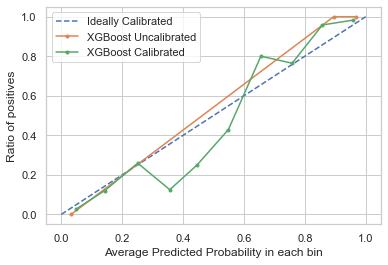

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(xgb, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = xgb.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'XGBoost Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'XGBoost Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [16]:
calibrated = CalibratedClassifierCV(xgb, method='sigmoid', cv=10)

scores_accuracy = cross_val_score(calibrated, X, Y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(calibrated, X, Y, cv=10, scoring='neg_log_loss')
scores_briar = cross_val_score(calibrated, X, Y, cv=10, scoring='neg_brier_score')
scores_auc = cross_val_score(calibrated, X, Y, cv=10, scoring='roc_auc')
scores_recall = cross_val_score(calibrated, X, Y, cv=10, scoring='recall')
scores_precision = cross_val_score(calibrated, X, Y, cv=10, scoring='precision')
scores_f1 = cross_val_score(calibrated, X, Y, cv=10, scoring='f1')
print('K-fold cross-validation results:')
print("XGBoost average accuracy is %2.3f" % scores_accuracy.mean())
print("XGBoost average log_loss is %2.3f" % -scores_log_loss.mean())
print("XGBoost average brier score is %2.3f" % -scores_briar.mean())
print("XGBoost average auc is %2.3f" % scores_auc.mean())
print("XGBoost average recall is %2.3f" % scores_recall.mean())
print("XGBoost average precision is %2.3f" % scores_precision.mean())
print("XGBoost average f1 is %2.3f" % scores_f1.mean())

K-fold cross-validation results:
XGBoost average accuracy is 0.817
XGBoost average log_loss is 0.407
XGBoost average brier score is 0.127
XGBoost average auc is 0.906
XGBoost average recall is 0.838
XGBoost average precision is 0.809
XGBoost average f1 is 0.822


In [21]:
#RFECV + Logistic Regression
X = X_balanced[['Cr', 'BMD_Hip_total', 'Histroy_Anticoagulant', 'History_Smoking']]

In [49]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [50]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 900}
Best Score is : 0.6074352085967131 


0.575 + or -0.066 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.572 + or -0.044 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.575 + or -0.043 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.565 + or -0.038 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.557 + or -0.036 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.567 + or -0.044 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.555 + or -0.045 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.554 + or -0.037 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max

In [22]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=900,
                   max_depth = 6, learning_rate = 0.01, colsample_bytree = 0.8)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.607
XGBoost  average log_loss is 0.679
XGBoost  average brier score is 0.240
XGBoost  average auc is 0.645
XGBoost  average recall is 0.636
XGBoost  average precision is 0.603
XGBoost  average f1 is 0.618


In [23]:
#RFECV + LightGBM
X = X_balanced[['Menopause_age', 'CRP', 'ALP', 'Ca', 'BMD_Hip_Neck', 'BMI']]

In [53]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [54]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 700}
Best Score is : 0.7692082806573957 


0.6 + or -0.041 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.602 + or -0.039 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.602 + or -0.031 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.599 + or -0.035 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.602 + or -0.036 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.599 + or -0.048 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.593 + or -0.046 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.598 + or -0.03 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_d

In [24]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=700,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.8)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.769
XGBoost  average log_loss is 0.496
XGBoost  average brier score is 0.162
XGBoost  average auc is 0.843
XGBoost  average recall is 0.798
XGBoost  average precision is 0.756
XGBoost  average f1 is 0.775


In [25]:
#RFECV + ADABoost
X = X_balanced[['Age', 'Menopause_age', 'Cr', 'ALP', 'Ca', 'Vit_D3', 'Tscore_vertebra', 
                'BMD_Hip_Neck', 'Pregnancy_Count']]

In [57]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [58]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 700}
Best Score is : 0.763748419721871 


0.64 + or -0.084 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.668 + or -0.073 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.687 + or -0.066 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.687 + or -0.064 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.683 + or -0.06 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.659 + or -0.054 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.677 + or -0.054 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.683 + or -0.061 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_de

In [26]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=700,
                   max_depth = 15, learning_rate = 0.1, colsample_bytree = 0.8)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.764
XGBoost  average log_loss is 0.617
XGBoost  average brier score is 0.181
XGBoost  average auc is 0.841
XGBoost  average recall is 0.845
XGBoost  average precision is 0.729
XGBoost  average f1 is 0.782
